# **1. Perkenalan Dataset**


Dataset ini berisi informasi medis pasien yang digunakan untuk memprediksi apakah seseorang berisiko diabetes atau tidak. Setiap baris mewakili satu pasien, dan setiap kolom menggambarkan fitur kesehatan tertentu. Fitur-fitur tersebut meliputi:

- **Pregnancies**: Jumlah kehamilan yang pernah dialami pasien.
- **Glucose**: Kadar glukosa plasma saat tes (mg/dL).
- **BloodPressure**: Tekanan darah diastolik (mm Hg).
- **SkinThickness**: Ketebalan lipatan kulit triceps (mm).
- **Insulin**: Kadar insulin serum (µU/mL).
- **BMI**: Indeks Massa Tubuh (kg/m²).
- **DiabetesPedigreeFunction**: Indeks risiko diabetes berdasarkan riwayat keluarga.
- **Age**: Usia pasien (tahun).
- **Outcome**: Label hasil klasifikasi: 1 = diabetes, 0 = tidak diabetes.

link dataset: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

# **2. Import Library**

Pada tahap pertama, berbagai library diimport untuk mempersiapkan proses analisis dan pemodelan machine learning. pandas dan numpy digunakan untuk mengolah serta memanipulasi data. matplotlib.pyplot dan seaborn dipakai untuk membuat visualisasi seperti grafik dan heatmap. train_test_split dari scikit-learn berfungsi membagi dataset menjadi data latih dan data uji. StandardScaler digunakan untuk menormalkan fitur numerik, sedangkan LabelEncoder berfungsi mengubah data kategorikal menjadi angka. SimpleImputer digunakan untuk menangani nilai yang hilang (missing values). Terakhir, modul warnings disetel agar tidak menampilkan pesan peringatan yang mengganggu saat proses analisis.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

# Set style untuk visualisasi
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

Matplotlib is building the font cache; this may take a moment.


# **3. Memuat Dataset**

Pada tahap ini, dataset diabetes.csv dimuat ke dalam program menggunakan pd.read_csv(), sehingga data dapat diolah dan dianalisis. Setelah berhasil dimuat, program menampilkan jumlah baris dan kolom untuk memastikan ukuran data. Kemudian, lima baris pertama dataset ditampilkan menggunakan df.head() untuk melihat gambaran awal struktur dan isi data. Terakhir, df.info() digunakan untuk menampilkan informasi detail mengenai tipe data, jumlah nilai non-null, dan struktur keseluruhan dataset. Tahap ini bertujuan untuk memastikan bahwa dataset telah terbaca dengan benar dan siap untuk dianalisis lebih lanjut.

In [7]:
# Load dataset
df = pd.read_csv('dataset_raw/diabetes.csv')

print(f"\n✓ Dataset berhasil dimuat!")
print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")


✓ Dataset berhasil dimuat!
Jumlah baris: 768
Jumlah kolom: 9


In [8]:
# Tampilkan 5 baris pertama
print("\n5 Baris Pertama Dataset:")
df.head()


5 Baris Pertama Dataset:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
# Info dataset
print("\nInformasi Dataset:")
df.info()


Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [10]:
# Statistik Deskriptif
print("\nStatistik Deskriptif:")
df.describe()


Statistik Deskriptif:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Berdasarkan statistik deskriptif dataset diabetes, terlihat bahwa nilai Glucose, BloodPressure, SkinThickness, Insulin, dan BMI memiliki nilai minimum 0, yang mengindikasikan adanya missing value terselubung atau data tidak valid. Rata-rata kadar glukosa cukup tinggi (120 mg/dL), sementara BMI rata-rata juga berada pada kategori overweight (31.9). Variabel Insulin memiliki rentang yang sangat besar (0–846), menunjukkan data yang sangat bervariasi dan kemungkinan outlier. Usia pasien rata-rata 33 tahun, dengan mayoritas masih dalam usia produktif. Proporsi pasien dengan diabetes (Outcome=1) sekitar 34.9%, menunjukkan dataset cukup seimbang meski tetap sedikit condong ke kelas non-diabetes. Secara keseluruhan, data menunjukkan adanya variabilitas tinggi dan potensi kualitas data yang perlu dibersihkan sebelum pemodelan.

In [11]:
# Melihat Missing Values
print("\nMissing Values:")
missing = df.isnull().sum()
print(missing[missing > 0])


Missing Values:
Series([], dtype: int64)


In [12]:
# Visualisasi missing values
if missing.sum() > 0:
    plt.figure(figsize=(10, 6))
    missing[missing > 0].plot(kind='bar')
    plt.title('Missing Values per Kolom')
    plt.xlabel('Kolom')
    plt.ylabel('Jumlah Missing Values')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [13]:
# Melakukan Distribusi Data Numerik
numeric_cols = df.select_dtypes(include=[np.number]).columns
print(f"\nKolom Numerik: {list(numeric_cols)}")


Kolom Numerik: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


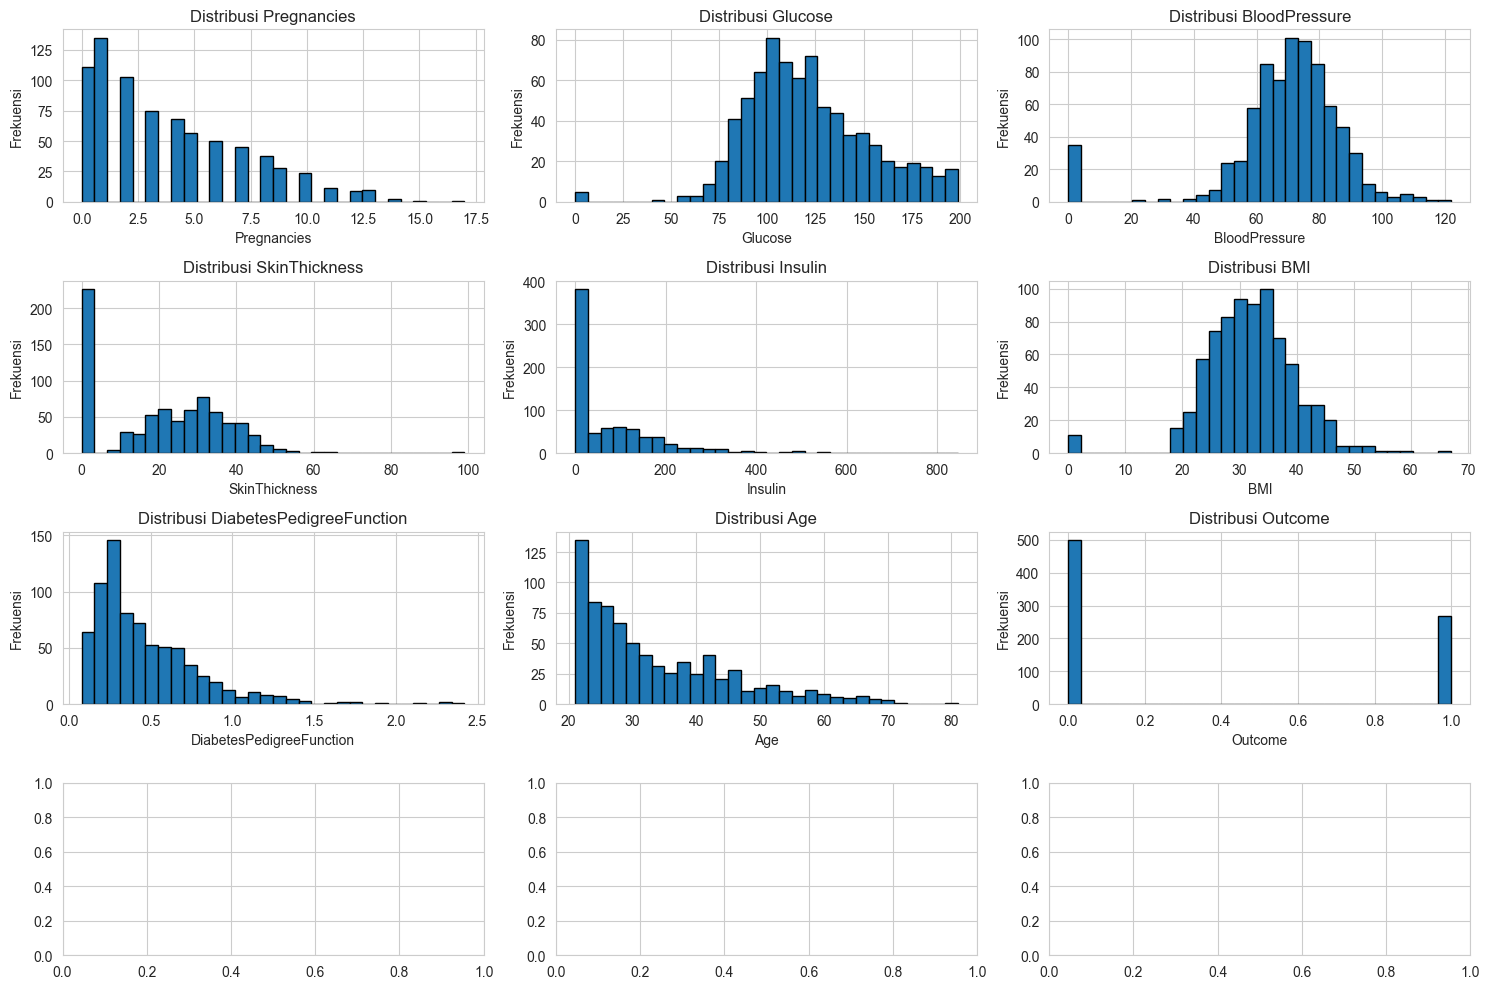

In [14]:
# Plot distribusi
fig, axes = plt.subplots(len(numeric_cols)//3 + 1, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, col in enumerate(numeric_cols):
    axes[idx].hist(df[col].dropna(), bins=30, edgecolor='black')
    axes[idx].set_title(f'Distribusi {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frekuensi')

plt.tight_layout()
plt.show()

Distribusi fitur pada dataset diabetes menunjukkan pola yang beragam, di mana beberapa variabel tampak normal sementara yang lain sangat skewed. Pregnancies, SkinThickness, Insulin, DiabetesPedigreeFunction, dan Age cenderung right-skewed, artinya banyak nilai kecil dan sedikit nilai tinggi yang menjadi outlier, terutama pada fitur Insulin yang memiliki nilai ekstrem hingga 800+. Sebaliknya, Glucose, BloodPressure, dan BMI terlihat lebih mendekati distribusi normal, meskipun tetap terdapat nilai 0 pada beberapa fitur medis yang sebenarnya tidak logis secara biologis. Sementara itu, Outcome bersifat biner dan terlihat tidak seimbang, dengan mayoritas data berada pada kelas 0 (tidak diabetes). Secara keseluruhan, dataset ini menunjukkan perlunya penanganan outlier, pemeriksaan nilai-nilai nol, serta mitigasi imbalance sebelum proses pemodelan.


Matriks Korelasi:
                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose               

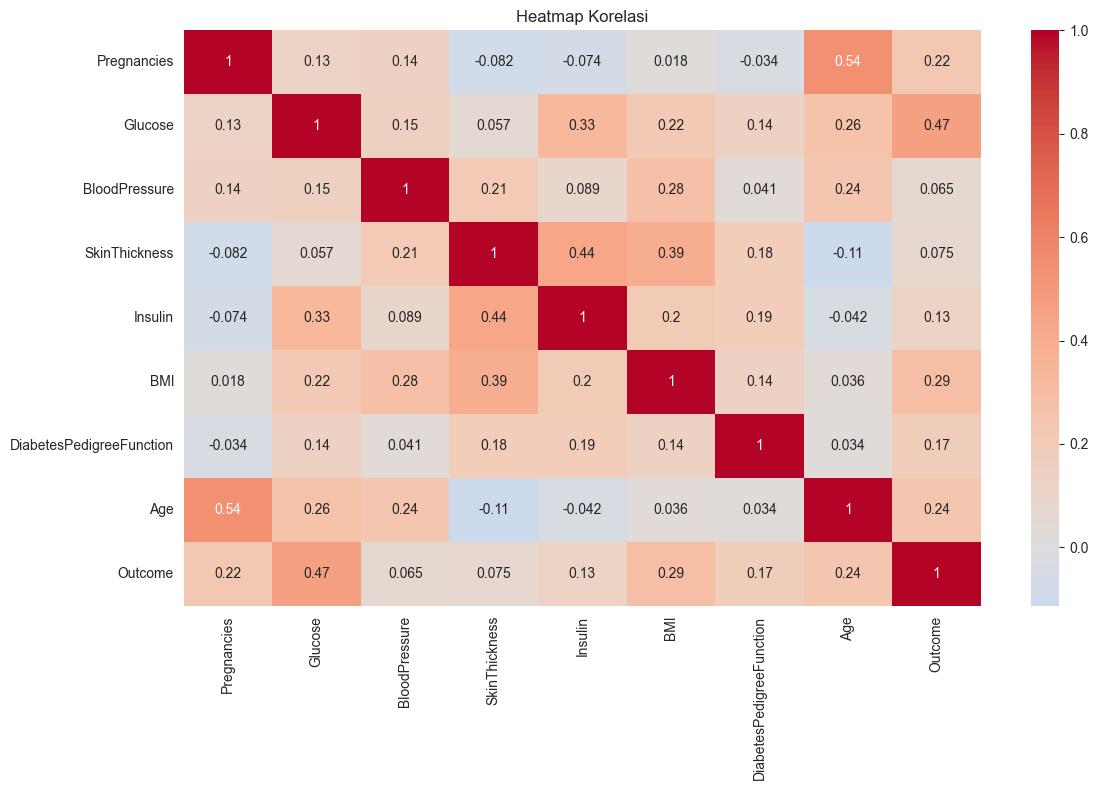

In [15]:
# Korelasi antar variabel numerik
print("\nMatriks Korelasi:")
correlation_matrix = df[numeric_cols].corr()
print(correlation_matrix)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap Korelasi')
plt.tight_layout()
plt.show()

**Analisis Matriks Korelasi:**
- Glucose memiliki korelasi tertinggi dengan Outcome (≈ 0.47) artinya semakin tinggi kadar glukosa, semakin besar kemungkinan seseorang terdiagnosis diabetes. Ini adalah fitur paling berpengaruh.
- Age juga punya korelasi cukup besar dengan Outcome (≈ 0.23) semakin tua seseorang, risiko Outcome = 1 lebih tinggi.
- BMI menunjukkan korelasi sedang dengan Outcome (≈ 0.29) orang dengan BMI lebih tinggi cenderung memiliki risiko diabetes lebih besar.
- Pregnancies berkorelasi positif dengan Outcome (≈ 0.22) semakin sering hamil, risiko diabetes meningkat (sesuai dengan pola nyata pada gestational diabetes).
- Fitur–fitur seperti BloodPressure, SkinThickness, dan DiabetesPedigreeFunction memiliki korelasi rendah terhadap Outcome tetap berguna, tapi pengaruh langsungnya kecil.
- Insulin memiliki korelasi rendah terhadap Outcome, namun berkorelasi cukup kuat dengan SkinThickness (≈ 0.44) ini menunjukkan adanya hubungan fisiologis antara keduanya.
- Tidak ada korelasi negatif kuat artinya semua fitur cenderung bergerak searah, hanya kekuatan pengaruhnya berbeda-beda.
- Tidak ada multikolinearitas berat (korelasi antar fitur > 0.8) model machine learning aman dari isu korelasi berlebih antar fitur.

In [16]:
# Distribusi Target Variable (jika ada)
target_col = 'Target'
if target_col in df.columns:
    print(f"\nDistribusi Target Variable ({target_col}):")
    print(df[target_col].value_counts())

    plt.figure(figsize=(8, 6))
    df[target_col].value_counts().plot(kind='bar')
    plt.title(f'Distribusi {target_col}')
    plt.xlabel(target_col)
    plt.ylabel('Jumlah')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [17]:
# Mendeteksi Outlier menggunakan IQR
print("\nDeteksi Outlier menggunakan IQR:")
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]
    print(f"{col}: {len(outliers)} outliers")


Deteksi Outlier menggunakan IQR:
Pregnancies: 4 outliers
Glucose: 5 outliers
BloodPressure: 45 outliers
SkinThickness: 1 outliers
Insulin: 34 outliers
BMI: 19 outliers
DiabetesPedigreeFunction: 29 outliers
Age: 9 outliers
Outcome: 0 outliers


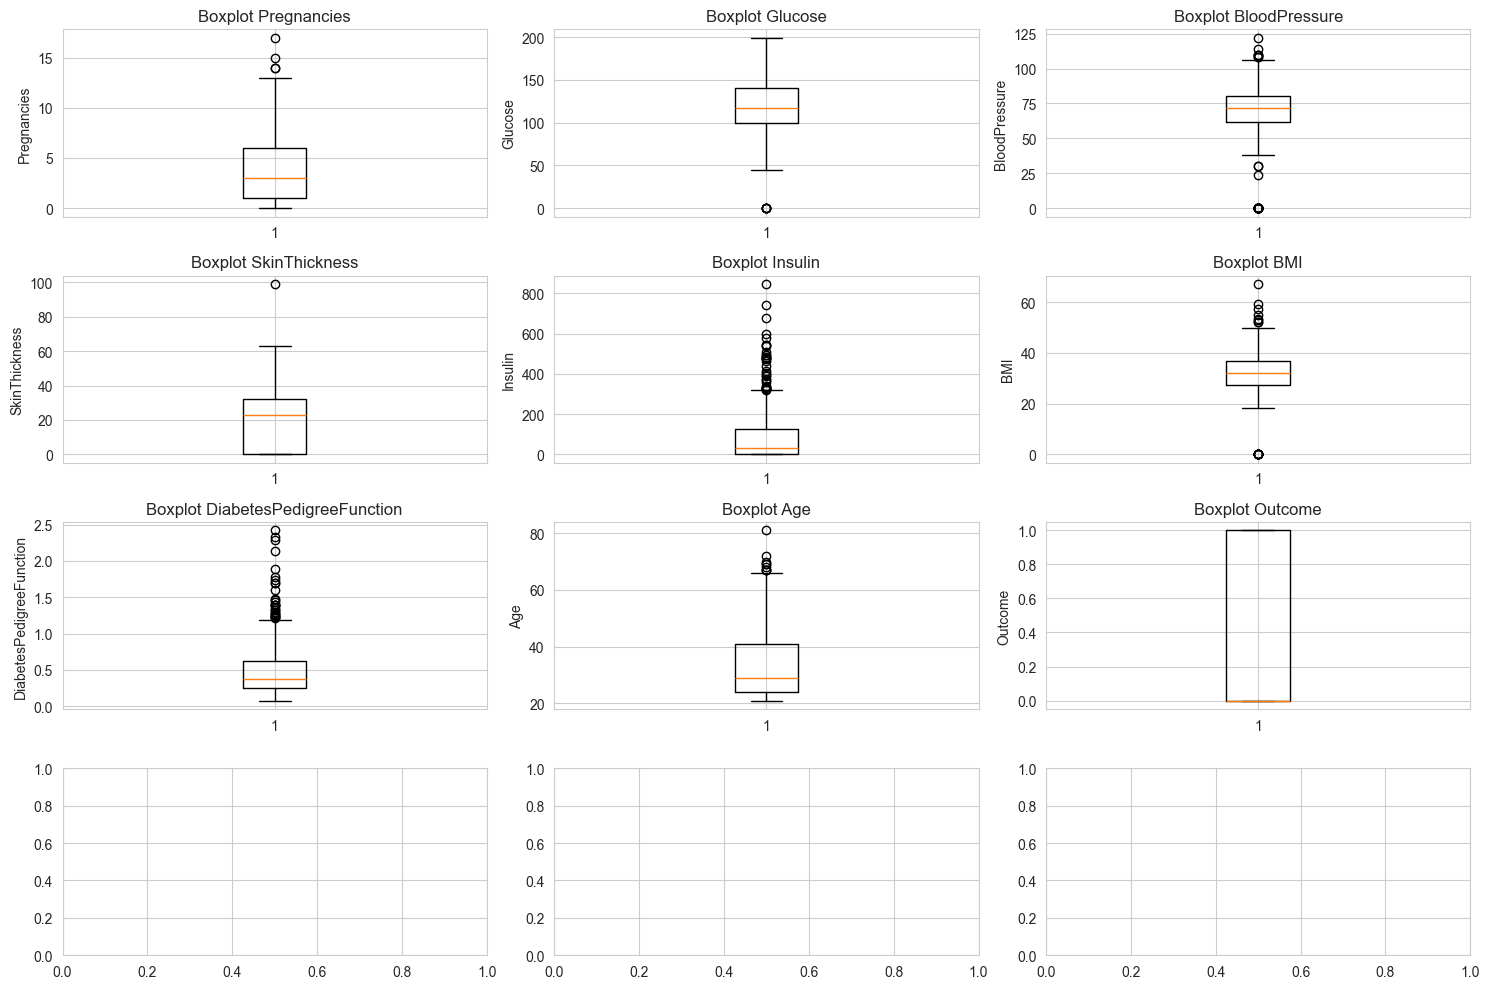

In [18]:
# Boxplot untuk visualisasi outlier
fig, axes = plt.subplots(len(numeric_cols)//3 + 1, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, col in enumerate(numeric_cols):
    axes[idx].boxplot(df[col].dropna())
    axes[idx].set_title(f'Boxplot {col}')
    axes[idx].set_ylabel(col)

plt.tight_layout()
plt.show()

Dari hasil boxplot, terlihat bahwa hampir semua fitur numerik dalam dataset memiliki outlier dengan jumlah yang cukup signifikan. Fitur seperti Insulin, SkinThickness, dan DiabetesPedigreeFunction menunjukkan sebaran nilai ekstrem yang jauh dari rentang normal, menandakan adanya variasi tinggi atau kemungkinan data tidak akurat. Glucose, BloodPressure, BMI, dan Pregnancies juga memiliki outlier meskipun tidak sebanyak Insulin. Sementara itu, fitur Outcome tidak memiliki outlier karena merupakan variabel biner. Secara keseluruhan, keberadaan outlier ini dapat mengganggu performa model sehingga pembersihan outlier sangat disarankan sebelum proses training.

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing ini bertujuan untuk membersihkan, menyiapkan, dan mengubah data mentah menjadi dataset yang siap digunakan untuk pelatihan model machine learning. Proses ini meliputi penanganan missing values, pembersihan outlier, encoding variabel kategorikal, melakukan scaling pada fitur numerik, serta memisahkan data menjadi train-test split sebelum akhirnya menyimpan hasil preprocessing ke file untuk digunakan pada tahap model training.

In [19]:
# Copy dataframe untuk preprocessing
df_processed = df.copy()

In [20]:
# Handling Missing Values
print("\n Handling Missing Values ")

# Untuk kolom numerik: isi dengan median
numeric_cols_with_missing = df_processed[numeric_cols].columns[df_processed[numeric_cols].isnull().any()].tolist()
if numeric_cols_with_missing:
    imputer_numeric = SimpleImputer(strategy='median')
    df_processed[numeric_cols_with_missing] = imputer_numeric.fit_transform(df_processed[numeric_cols_with_missing])
    print(f" Missing values pada kolom numerik diisi dengan median")

# Untuk kolom kategorikal: isi dengan modus
categorical_cols = df_processed.select_dtypes(include=['object']).columns
categorical_cols_with_missing = df_processed[categorical_cols].columns[df_processed[categorical_cols].isnull().any()].tolist()
if categorical_cols_with_missing:
    imputer_categorical = SimpleImputer(strategy='most_frequent')
    df_processed[categorical_cols_with_missing] = imputer_categorical.fit_transform(df_processed[categorical_cols_with_missing])
    print(f" Missing values pada kolom kategorikal diisi dengan modus")

print(f"Missing values setelah handling: {df_processed.isnull().sum().sum()}")


 Handling Missing Values 
Missing values setelah handling: 0


In [21]:
# Handling Outliers
print("\n Handling Outliers ")

def remove_outliers_iqr(df, columns):
    df_clean = df.copy()

    mask = pd.Series([True] * len(df_clean))  # awalnya semua baris dianggap valid

    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # update mask: row valid jika berada dalam batas IQR
        mask &= df_clean[col].between(lower_bound, upper_bound)

    # hanya simpan baris yang memenuhi semua kondisi kolom
    return df_clean[mask]

df_processed = remove_outliers_iqr(df_processed, numeric_cols)
print(f"Jumlah data setelah handling outliers: {df_processed.shape[0]}")


 Handling Outliers 
Jumlah data setelah handling outliers: 639



 Boxplot Setelah Outlier Dibersihkan


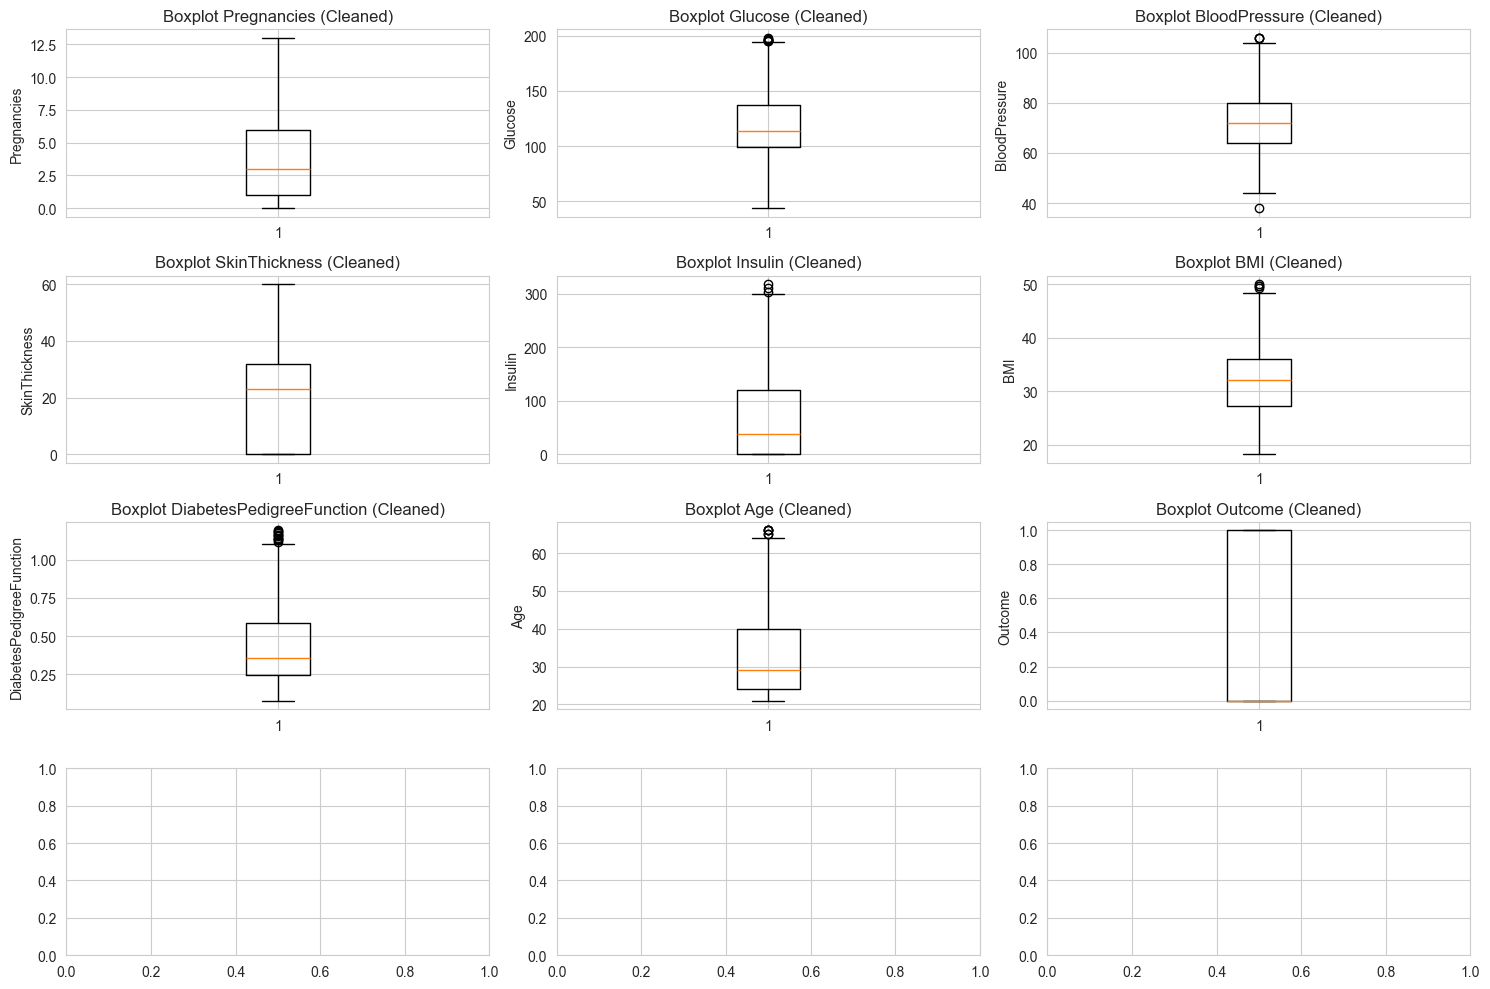

In [22]:
# Boxplot setelah pembersihan outlier
print("\n Boxplot Setelah Outlier Dibersihkan")

fig, axes = plt.subplots(len(numeric_cols)//3 + 1, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, col in enumerate(numeric_cols):
    axes[idx].boxplot(df_processed[col].dropna())
    axes[idx].set_title(f'Boxplot {col} (Cleaned)')
    axes[idx].set_ylabel(col)

plt.tight_layout()
plt.show()

In [23]:
# Encoding Categorical Variables
print("\n Encoding Categorical Variables ")

label_encoders = {}
for col in categorical_cols:
    if col != target_col:  # Jangan encode target jika kategorikal
        le = LabelEncoder()
        df_processed[col] = le.fit_transform(df_processed[col].astype(str))
        label_encoders[col] = le
        print(f"✓ {col} di-encode")


 Encoding Categorical Variables 


In [24]:
# Feature Scaling
print("\n Feature Scaling ")

# Pisahkan features dan target
if target_col in df_processed.columns:
    X = df_processed.drop(columns=[target_col])
    y = df_processed[target_col]
else:
    X = df_processed
    y = None

# Scaling features
scaler = StandardScaler()
X_scaled = pd.DataFrame(
    scaler.fit_transform(X),
    columns=X.columns,
    index=X.index
)

print(f" Features di-scaling menggunakan StandardScaler")


 Feature Scaling 
 Features di-scaling menggunakan StandardScaler


In [25]:
# Train-Test Split
print("\n Train-Test Split ")

if y is not None:
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.2, random_state=42, stratify=y
    )
    print(f" Data training: {X_train.shape[0]} samples")
    print(f" Data testing: {X_test.shape[0]} samples")
else:
    X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)
    y_train, y_test = None, None


 Train-Test Split 


In [26]:
# Save Preprocessed Data
print("\n Saving Preprocessed Data ")

# Gabungkan kembali X dan y untuk disimpan
if y is not None:
    train_data = pd.concat([X_train, y_train.reset_index(drop=True)], axis=1)
    test_data = pd.concat([X_test, y_test.reset_index(drop=True)], axis=1)
else:
    train_data = X_train
    test_data = X_test


 Saving Preprocessed Data 


In [27]:
# Save ke folder preprocessing
train_data.to_csv('preprocessing/dataset_preprocessing/train_data.csv', index=False)
test_data.to_csv('preprocessing/dataset_preprocessing/test_data.csv', index=False)

print(f" Data preprocessed disimpan di: preprocessing/dataset_preprocessing/")
print(f"  - train_data.csv: {train_data.shape}")
print(f"  - test_data.csv: {test_data.shape}")

 Data preprocessed disimpan di: preprocessing/dataset_preprocessing/
  - train_data.csv: (511, 9)
  - test_data.csv: (128, 9)


In [28]:
print("SUMMARY PREPROCESSING")

print(f"Dataset awal: {df.shape}")
print(f"Dataset setelah preprocessing: {df_processed.shape}")
print(f"Jumlah fitur: {X_scaled.shape[1]}")
print(f"Data training: {X_train.shape[0]} samples")
print(f"Data testing: {X_test.shape[0]} samples")
print("\n Eksperimen selesai!")

SUMMARY PREPROCESSING
Dataset awal: (768, 9)
Dataset setelah preprocessing: (639, 9)
Jumlah fitur: 9
Data training: 511 samples
Data testing: 128 samples

 Eksperimen selesai!
